# Firing a canon ball
This is an example notebook to introduce you to concepts in computing and physics; and to give you a chance to practice making this work yourself in Spyder.

First, import packages that we will use for doing the maths and making plots.

In [1]:
# This package has all the basic maths in it
import numpy as np

# This module has key functions in it you will use later - go look at it!
import enu_407 as enu

# This package has some powerful code for plotting figures
# The rc sets defaults that allow better import of pdf figures into CorelDraw
import matplotlib.pyplot as plt
from matplotlib import rc
rc('pdf', fonttype=42)
rc('font',size=10,family='Arial')

Define the azimuth (direction of aim), inclination angle of canon, and initial velocity (i.e. the charge that was used).

Also, define key terms used to calculate trajectory.

All inputs are in SI units. 

We choose a Cartesian coordinate system (x,y,z) with x=East, y=North, z=Up (ENU).

<img src="ENU_coordinates.jpg" align="left" width="250"/>


In [2]:
#------------ Input gun aim -----------------------
# Initial velocity in m/s
v0_Mag = 300.0
# direction is upwards, so -ve plunge
plunge = -30.0
trend = 40.0

#------------ known parameters --------------------
# CANON BALL WEIGHT FORCE
# radius of canon ball (m)
r = 0.08
# density of canon ball (kg/m3)
density = 7860
# mass of canon ball
mass = (4/3) * np.pi * r**3 * density
# gravity is acceleration vector downwards
g = np.array([0,0,-9.8])
# weight vector
weight = mass * g

# WIND RESISTANCE FORCE
# see https://en.wikipedia.org/wiki/Drag_coefficient
def windResistanceForce(v,r):
    # drag coefficient
    Cd = 0.45
    # Cross-sectional area
    area = np.pi * r**2
    # density of air (kg/m3)
    rhoAir = 1.3
    # magnitude of velocity
    vMag = np.linalg.norm(v)
    # return 
    return -0.5 * Cd * area * rhoAir * vMag * v

Now solve the problem using a finite difference method, i.e. solve Newton's laws at each time step

In [3]:
# Define initial velocity vector 
v0 = v0_Mag * enu.dirVecLine(plunge,trend)

# Create time array t. Use vz to work out approx how long is needed.
n = 1000
tMax = 2 * v0[2] / 9.8
t = np.linspace(0,tMax,n)
dt = t[1]

# position array initiated with zeros
position = np.zeros([n,3])

# solve Newton's law at each time step
v =v0
for i in range(1,n):
    
    position[i] = position[i-1] + v*dt
    
    force = weight + windResistanceForce(v,r)
    a = force/mass
    v = v + a*dt
    
# select positons above ground as valid
iSel = (position[:,2] >= 0)
# and convert row to column position vectors
position = np.transpose(position[iSel])
''' 
you could also use: 
position = position[iSel].T
'''

Now plot results

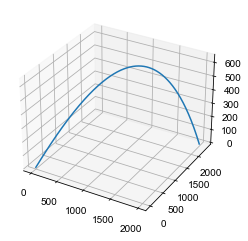

In [4]:
# Create a figure for plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
x = position[0]
y = position[1]
z = position[2]
ax.plot(x, y, z)

plt.savefig('../figs/canonBall.jpg',dpi=300)
plt.savefig('../figs/canonBall.pdf')


## Your tasks

- Run this code: 'Kernel' - 'Restart and Run All'.

- Copy this code into *spyder* and get it to work there. You will need to copy enu_407.py to the 'code' directory and save your code there before you try to run it.

- Take a close look at enu_407.py and understand what it is doing, and how it is 'imported'.

- Take a close look at how functions are defined and look at the output using spyder.

- Look at how the finite difference scheme was implemented - and how simple it is!

- Look at how x,y,z are *sliced* from the position array.

- Look at how plotting was done and saved for publication quality.

### Write some new code

Try rotating the trajectory back to due north by adding in these lines just before you plot  
`R = enu.rotationMatrixAroundZ(-trend)
position = R @ position`

The `@` is matrix multiplication.  
It could equally be accomplished with the function  
`position = np.matmul(R,position)`  
  
Notice anything strange in the plot?

### Stress in the earth
Consider a situation where...   
The minimum principal stress $\sigma_3$ has magnitude 200 MPa and is horizontal and due east.  
The maximum principal stress $\sigma_1$ has magnitude 600 MPa and is horizontal and due north.  
The intermediate principal stress $\sigma_2$ has magnitude 400 MPa and is vertical.  

- Create a new file in spyder and call it `stressTensor.py`.
- Instantiate an array `S0` that is a stress tensor (3x3 array) appropriate for the problem above and in SI units.
  
The actual azimuth of maximum horizontal stress $S_{Hmax}$ is 110&deg;.  
- Rotate the stress tensor to find `S110` for that case.
- Rotate `S0` by 90&deg; to check your code (what should this do?).

